In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Question-1
male_url ="https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv"
female_url ="https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv"


In [19]:
#Question-2
male   = np.genfromtxt(male_url, delimiter=",")[1:, :]
female = np.genfromtxt(female_url, delimiter=",")[1:, :]

male_df = pd.read_csv(male_url, comment="#")
female_df =pd.read_csv(female_url, comment="#")

In [20]:
male.shape

(4081, 7)

In [21]:
female.shape

(4221, 7)

In [22]:
male_df.head(5)

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0


In [23]:
female_df.head(5)

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2


<b>Using numpy.genfromtxt produces pure matrices for numeric tasks, while pandas.read_csv is handy for previews and column naming.</b>

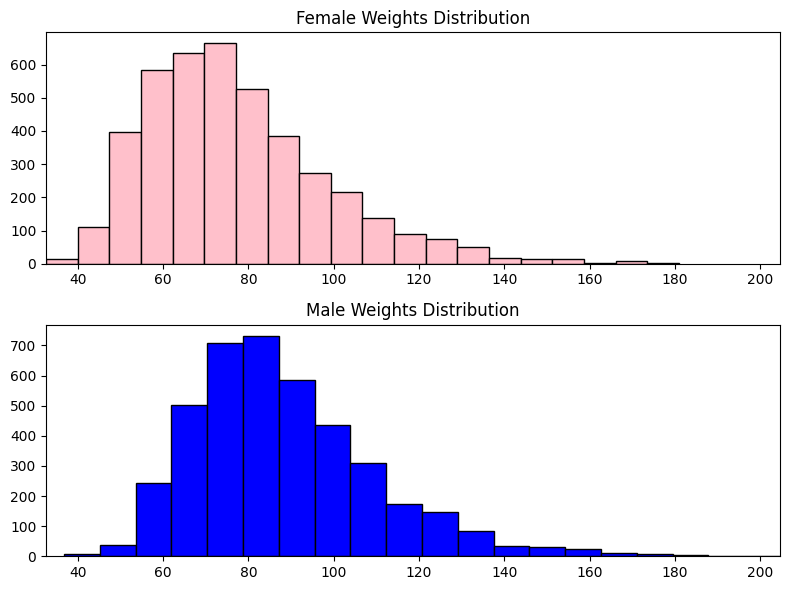

In [24]:
#Question-3

male_weights = male_df['BMXWT']
female_weights = female_df['BMXWT']

# Determine common x-axis limits
min_weight = min(male_weights.min(), female_weights.min())
max_weight = max(male_weights.max(), female_weights.max())

# Plot histograms
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=20, color='pink', edgecolor='black')
plt.title('Female Weights Distribution')
plt.xlim(min_weight, max_weight)

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=20, color='blue', edgecolor='black')
plt.title('Male Weights Distribution')
plt.xlim(min_weight, max_weight)

plt.tight_layout()
plt.show()

<b>Identical x‑limits remove scale bias. Typically, male weights are centered higher with a broader spread.</b>

C:\Users\induk\AppData\Local\Temp\ipykernel_17252\2591568773.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


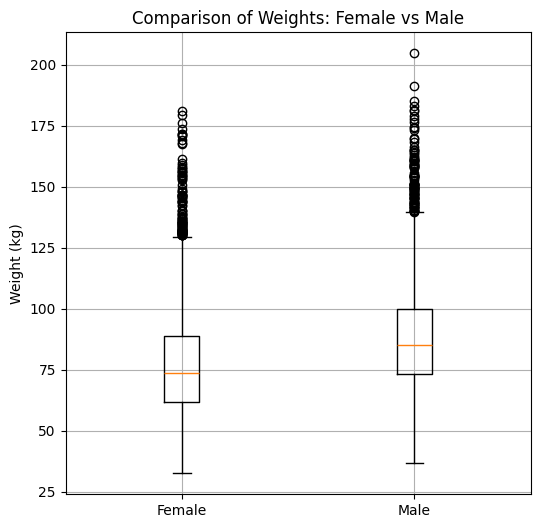

In [25]:
#Question-4

male_weights = male_df['BMXWT']
female_weights = female_df['BMXWT']

# Create the boxplot
plt.figure(figsize=(6, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Comparison of Weights: Female vs Male')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

<b>Compare medians, IQRs, and outliers. Expect a higher male median and wider IQR.</b>

In [26]:
#Question-5

from scipy.stats import skew, kurtosis

def summarize(x):
    return {
        "n": len(x),
        "mean": float(np.mean(x)),
        "median": float(np.median(x)),
        "std": float(np.std(x, ddof=1)),
        "var": float(np.var(x, ddof=1)),
        "min": float(np.min(x)),
        "max": float(np.max(x)),
        "skew": float(skew(x, bias=False)),
        "kurtosis_excess": float(kurtosis(x, fisher=True, bias=False))
    }

male_stats   = summarize(male_weights)
female_stats = summarize(female_weights)

pd.DataFrame([male_stats, female_stats], index=["Male", "Female"])

,n,mean,median,std,var,min,max,skew,kurtosis_excess
Male,4081,88.364543,85.0,21.421561,458.883294,36.8,204.6,0.984643,1.477568
Female,4221,77.403791,73.6,21.545061,464.189635,32.6,180.9,1.033728,1.404052


<b>Interpretation: positive skew indicates heavier right tail; kurtosis (excess)>0 suggests heavier tails. Expect males to have higher mean and dispersion.</b>

In [27]:
#Question-6

height_male_female = female[:, 1] / 100.0
bmi_female = female[:, 0] / (height_male_female ** 2)

female_bmi_added = np.column_stack([female, bmi_female])  # 8th column is BMI
female_bmi_added.shape


(4221, 8)

<b>This BMI column is used later for standardisation and correlation analysis.</b>

In [28]:
#Question-7

mu = female_bmi_added.mean(axis=0)
sd = female_bmi_added.std(axis=0, ddof=1)
zfemale = (female_bmi_added - mu) / sd
zfemale[:5, :]  # preview first 5 rows

array([[ 0.91418677,  0.00894932, -0.56732742,  1.13285382,  0.55078021,
         1.08303325,  1.11565244,  0.9968496 ],
       [ 0.63570067, -1.05294368, -1.07880364, -1.29333838,  1.03209576,
         1.04463152,  0.26505759,  1.15603786],
       [-0.20439908,  0.15053505,  0.58349407,  0.26191303, -0.16227987,
        -0.1906243 , -0.37288855, -0.2592443 ],
       [-0.72888124, -0.38749073,  0.83923218, -0.7645529 , -0.66142193,
        -0.52343933, -0.45909748, -0.67031143],
       [-1.02129166, -0.78393078, -0.60995044, -0.98228809, -0.78620744,
        -1.06746392, -1.4533739 , -0.89279282]])

<b>Z‑scoring enables fair comparison of variables on different scales.</b>

(          Weight_z  Height_z     Hip_z   Waist_z     BMI_z
 Weight_z  1.000000  0.345496  0.946553  0.904550  0.945900
 Height_z  0.345496  1.000000  0.202895  0.126547  0.033077
 Hip_z     0.946553  0.202895  1.000000  0.897407  0.944199
 Waist_z   0.904550  0.126547  0.897407  1.000000  0.921198
 BMI_z     0.945900  0.033077  0.944199  0.921198  1.000000,
           Weight_z  Height_z     Hip_z   Waist_z     BMI_z
 Weight_z  1.000000  0.338860  0.946634  0.900169  0.937999
 Height_z  0.338860  1.000000  0.205405  0.108587  0.019897
 Hip_z     0.946634  0.205405  1.000000  0.888037  0.934196
 Waist_z   0.900169  0.108587  0.888037  1.000000  0.923114
 BMI_z     0.937999  0.019897  0.934196  0.923114  1.000000)

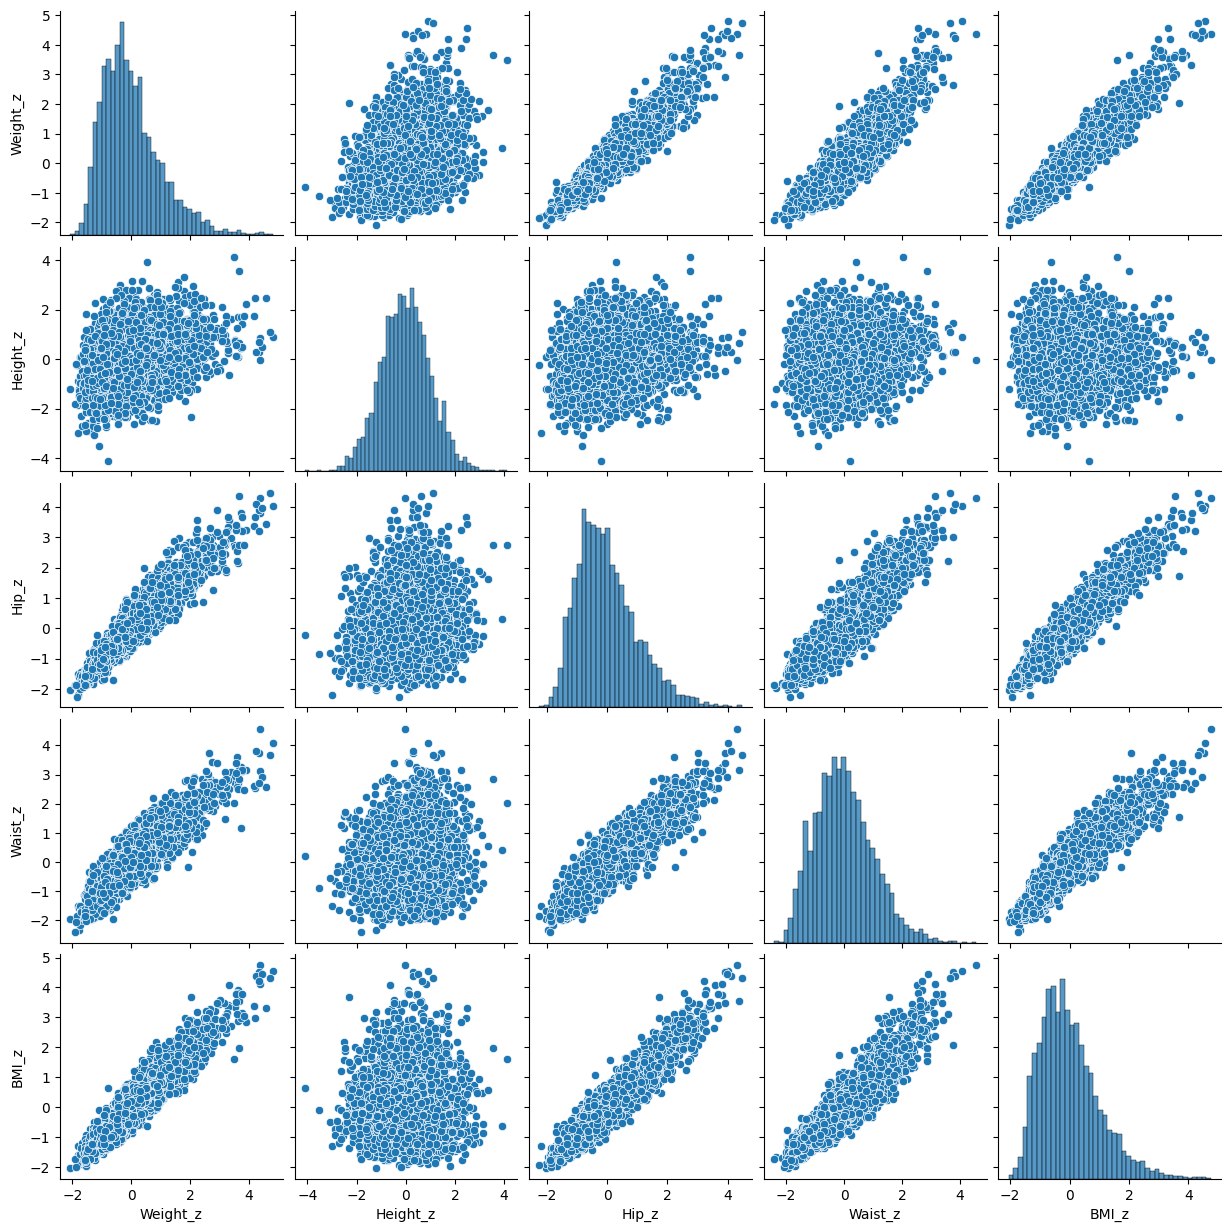

In [29]:
#Question-8

import seaborn as sns

cols = {
    "Weight_z": 0,
    "Height_z": 1,
    "Hip_z": 5,
    "Waist_z": 6,
    "BMI_z": 7
}

zf_df = pd.DataFrame({
    k: zfemale[:, idx] for k, idx in cols.items()
})

# Pairplot (scatterplot matrix)
sns.pairplot(zf_df, diag_kind="hist")

# Correlation matrices
pearson_corr = zf_df.corr(method="pearson")
spearman_corr = zf_df.corr(method="spearman")
pearson_corr, spearman_corr

<b>Expect strong positive associations between BMI, weight, and waist; height relates weakly to BMI.</b>

In [30]:
#Question-9

def add_ratios(mat):
    weight = mat[:, 0]         # not used here
    height_cm = mat[:, 1]
    hip_cm = mat[:, 5]
    waist_cm = mat[:, 6]
    waist_to_height = waist_cm / height_cm
    waist_to_hip = waist_cm / hip_cm
    return np.column_stack([mat, waist_to_height, waist_to_hip])

male_with_ratios = add_ratios(male)
female_with_ratios = add_ratios(female_bmi_added)  # already has BMI as col 8
male_with_ratios.shape, female_with_ratios.shape

((4081, 9), (4221, 10))

<b>Ratios normalise for body size; useful for central adiposity assessment.</b>

C:\Users\induk\AppData\Local\Temp\ipykernel_17252\3654463064.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([f_wth, m_wth, f_whr, m_whr],


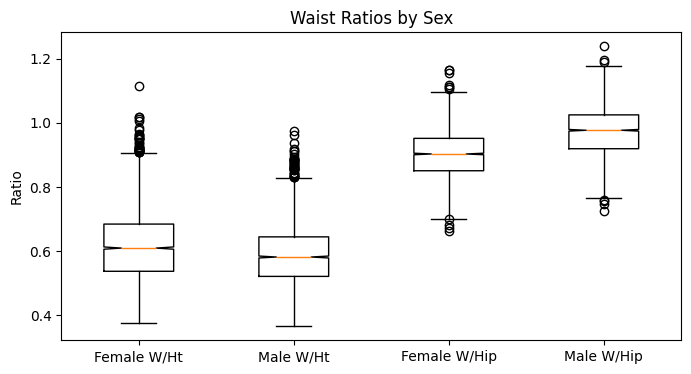

In [31]:
#Question-10

# Column indices after additions:
# female_bmi_added has 8 cols; after add_ratios -> cols 8: waist/height, 9: waist/hip
f_wth = female_with_ratios[:, 8]
f_whr = female_with_ratios[:, 9]
# male has 7 cols; after add_ratios -> cols 7: waist/height, 8: waist/hip
m_wth = male_with_ratios[:, 7]
m_whr = male_with_ratios[:, 8]

plt.figure(figsize=(8, 4))
plt.boxplot([f_wth, m_wth, f_whr, m_whr],
            labels=["Female W/Ht", "Male W/Ht", "Female W/Hip", "Male W/Hip"],
            notch=True, showfliers=True)
plt.title("Waist Ratios by Sex")
plt.ylabel("Ratio")
plt.show()

<b>W/Ht often shows clearer separation by adiposity; W/Hip reflects fat distribution patterns between sexes.</b>

<b>Question-11</b>

<b>BMI</b>: Advantages- Simple; widely used; correlates with many health risks. Disadvantages- Does not distinguish fat vs. muscle;
ignores fat distribution; height‑squared scaling imperfect for all bodies.
<br/><br/>
<b>Waist to Height Ratio</b>: Advantages- Incorporates central adiposity; one size‑normalized measure across sexes and ethnicities;
predictive for cardiometabolic risk. Disadvantages- Still a single‑number summary; measurement error in waist/height.
<br/><br/>
<b>WHR</b>: Advantages- Focuses on fat distribution (android vs. gynoid). Disadvantages- Hip circumference measurement variability;
less directly tied to total adiposity than BMI/WHtR; may vary with posture and technique.

In [32]:
#Question-12

# zfemale columns: [0..7] with 7==BMI_z
order = np.argsort(zfemale[:, 7])   # sort by BMI_z
idx_low5 = order[:5]
idx_high5 = order[-5:]

selected = np.vstack([zfemale[idx_low5, :], zfemale[idx_high5, :]])
pd.DataFrame(selected, columns=[
    "Weight_z","Height_z","ArmLen_z","LegLen_z","ArmCirc_z","Hip_z","Waist_z","BMI_z"
]).round(3)

,Weight_z,Height_z,ArmLen_z,LegLen_z,ArmCirc_z,Hip_z,Waist_z,BMI_z
0,-2.080,-1.223,-1.548,-1.169,-2.195,-2.040,-1.942,-2.050
1,-1.880,-0.189,-1.718,0.386,-2.444,-1.855,-2.057,-1.995
2,-1.536,1.807,0.626,0.573,-2.266,-1.675,-1.706,-1.971
3,-1.843,-0.260,-0.226,0.511,-2.301,-2.252,-1.856,-1.942
4,-1.611,0.887,-0.098,0.480,-2.212,-1.829,-1.712,-1.893
5,4.247,0.292,1.862,-0.982,2.369,4.104,3.817,4.396
6,4.456,0.504,1.692,-1.138,3.350,3.982,2.903,4.461
7,4.349,0.278,2.843,1.942,4.366,3.918,3.754,4.514
8,4.804,0.887,2.118,1.817,3.777,4.021,4.081,4.542
9,4.363,-0.034,-0.056,-0.174,2.779,4.315,4.570,4.762


<b>Expect strong contrasts in Weight_z and Waist_z between low‑ and high‑BMI groups; Height_z varies less.</b>